In [21]:
!jupyter nbconvert --to script train_segmentation.ipynb

[NbConvertApp] Converting notebook train_example.ipynb to script
[NbConvertApp] Writing 15264 bytes to train_example.py


In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from config import args
from pytorch_lightning import Trainer, loggers
from models import SegmentationModel
from augmentations import get_transforms
from datasets import get_train_val_dataloaders
import warnings 
import cv2
import numpy as np
from pathlib import Path
warnings.filterwarnings(action= 'ignore')

# Get augmentation

In [3]:
transform_train=get_transforms('rcf')
transform_train_512=get_transforms('rcf512')
transform_val=get_transforms('center_c')
transform_val_512=get_transforms('center_c512')


# transform_train_sm=get_transforms('rcr128')
# transform_val_sm=get_transforms('center_cr128')

# Get data loaders

In [4]:
train_dataloader, val_dataloader = get_train_val_dataloaders(
    transform_train=transform_train, transform_val=transform_val,
    include_massachusetts=False,
    num_workers=8,
    batch_size=4,
)

train_dataloader_512, val_dataloader_512 = get_train_val_dataloaders(
    transform_train=transform_train_512, transform_val=transform_val_512,
    include_massachusetts=False,
    num_workers=8,
    batch_size=4,
    large=True
)

train_dataloader_full, _ = get_train_val_dataloaders(
    split_percent=1.00,
    transform_train=transform_train, transform_val=None,
    include_massachusetts=False,
    num_workers=8,
    batch_size=4,
)

train_dataloader_full_512, _ = get_train_val_dataloaders(
    split_percent=1.00,
    transform_train=transform_train_512, transform_val=None,
    include_massachusetts=False,
    num_workers=8,
    batch_size=4,
    large=True
)

dataloader_for_vis, _ = get_train_val_dataloaders(
    split_percent=1.00,
    transform_train=transform_val, transform_val=None,
    include_massachusetts=False,
    num_workers=8,
    batch_size=4,
    large=False
)
dataloader_for_vis_512, _ = get_train_val_dataloaders(
    split_percent=1.00,
    transform_train=transform_val_512, transform_val=None,
    include_massachusetts=False,
    num_workers=8,
    batch_size=4,
    large=True
)

# Get model

In [5]:
# model_256 = SegmentationModel.load_from_checkpoint('./logs/lightning_logs/version_175/checkpoints/epoch=179-step=1260.ckpt',seg_model='deeplabv3plus')

In [6]:
# model_512 = SegmentationModel.load_from_checkpoint('./logs/lightning_logs/version_174/checkpoints/epoch=176-step=1239.ckpt', seg_model='deeplabv3plus')

In [7]:
# model_256_unet = SegmentationModel.load_from_checkpoint('./logs/lightning_logs/version_176/checkpoints/epoch=179-step=1260.ckpt',seg_model='unet')

In [8]:
# model_512_unet = SegmentationModel.load_from_checkpoint('./logs/lightning_logs/version_177/checkpoints/epoch=187-step=1316.ckpt', seg_model='unet')

In [29]:
model_256_unet_full = SegmentationModel.load_from_checkpoint('./logs/unet_256_full/version_0/checkpoints/epoch=179-step=1620.ckpt', seg_model='unet')

In [30]:
# model_256_unet_scse_full = SegmentationModel.load_from_checkpoint('./logs/unet_scse_256_full//version_1/checkpoints/epoch=179-step=1620.ckpt', seg_model='unet_big')

In [31]:
model_512_unet_full = SegmentationModel.load_from_checkpoint('./logs/unet_512_full/version_0/checkpoints/epoch=179-step=1620.ckpt', seg_model='unet')

In [24]:
# model_512_unet_scse_full = SegmentationModel.load_from_checkpoint('./logs/unet_scse_512_full/version_1/checkpoints/epoch=179-step=1620.ckpt', seg_model='unet_big')

In [14]:
# model_256_dlv3_full = SegmentationModel.load_from_checkpoint('./logs/dlv3_256_full/version_0/checkpoints/epoch=179-step=1620.ckpt', seg_model='deeplabv3plus')

In [15]:
# model_512_dlv3_full = SegmentationModel.load_from_checkpoint('./logs/dlv3_512_full/version_0/checkpoints/epoch=179-step=1620.ckpt', seg_model='deeplabv3plus')

In [25]:
model_256_dlv3_full = SegmentationModel.load_from_checkpoint('./logs/dlv3_256_full/version_1/checkpoints/epoch=249-step=2250.ckpt', seg_model='deeplabv3plus')

In [27]:
model_512_dlv3_full = SegmentationModel.load_from_checkpoint('./logs/dlv3_512_full/version_1/checkpoints/epoch=249-step=2250.ckpt', seg_model='deeplabv3plus')

# Train model

In [ ]:
def get_trainer(name):
    tb_logger = loggers.TensorBoardLogger(save_dir="logs/", name=name)
    trainer = Trainer(gpus=[0,1,2,3],
                  max_epochs=250, 
                  logger=tb_logger,
                  accelerator='ddp',
                  resume_from_checkpoint=args.checkpoint_path,
                  log_every_n_steps=10
    )
    return trainer

In [ ]:
# unet_256 = SegmentationModel('unet')    
# unet_512 = SegmentationModel('unet')    
# unet_big_256 = SegmentationModel('unet_big')    
# unet_big_512 = SegmentationModel('unet_big')    
dlv3_256 = SegmentationModel('deeplabv3plus')    
dlv3_512 = SegmentationModel('deeplabv3plus')    


# trainer = get_trainer('unet_256_full')
# trainer.fit(unet_256, train_dataloader_full)
# trainer = get_trainer('unet_512_full')
# trainer.fit(unet_512, train_dataloader_full_512)
trainer = get_trainer('dlv3_256_full')
trainer.fit(dlv3_256, train_dataloader_full)
trainer = get_trainer('dlv3_512_full')
trainer.fit(dlv3_512, train_dataloader_full_512)



In [30]:
# # model=model.train()
# args.gpus = [0,1,2,3] # Remove this line if you actually have gpus
# # args.gpus = [0] # Remove this line if you actually have gpus


# trainer.fit(model_256, train_dataloader, val_dataloader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name  | Type | Params
-------------------------------
0 | model | Unet | 29.1 M
-------------------------------
29.1 M    Trainable params
0         Non-trainable params
29.1 M    Total params
116.232   Total estimated model params size (MB)


A Jupyter Widget

A Jupyter Widget

Traceback (most recent call last):
  File "/root/anaconda3/envs/CIL_Sleeplearning/lib/python3.9/multiprocessing/queues.py", line 241, in _feed
    close()
  File "/root/anaconda3/envs/CIL_Sleeplearning/lib/python3.9/multiprocessing/connection.py", line 182, in close
    self._close()
  File "/root/anaconda3/envs/CIL_Sleeplearning/lib/python3.9/multiprocessing/connection.py", line 366, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


A Jupyter Widget

Exception ignored in: <function _releaseLock at 0x7f4a26429700>
Traceback (most recent call last):
  File "/root/anaconda3/envs/CIL_Sleeplearning/lib/python3.9/logging/__init__.py", line 227, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 


# Visualize

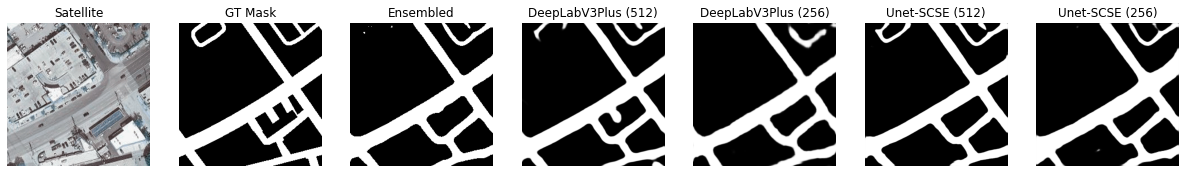

In [36]:
import matplotlib.pyplot as plt
import torch
#idx=14,18,19,29, 44, 51 dl512 >>> dl 256
#idx = 22,41 ensemble is good
idx = 41
img_256, mask_256 = dataloader_for_vis.dataset[idx]
img_512, mask_512 = dataloader_for_vis_512.dataset[idx]
# fused = model.model.get_fused_input(torch.Tensor(img[None,:]))
pred_mask_512=model_512_dlv3_full.predict(torch.Tensor(img_512[None,:]).to(model_512_dlv3_full.device)).detach().cpu().numpy()[0]
pred_mask_256=model_256_dlv3_full.predict(torch.Tensor(img_256[None,:]).to(model_256_dlv3_full.device)).detach().cpu().numpy()[0]
pred_mask_unet_256=model_256_unet_full.predict(torch.Tensor(img_256[None,:]).to(model_256_unet_full.device)).detach().cpu().numpy()[0]
pred_mask_unet_512=model_512_unet_full.predict(torch.Tensor(img_512[None,:]).to(model_512_unet_full.device)).detach().cpu().numpy()[0]

resized_pred_mask = cv2.resize(pred_mask_512.transpose(1,2,0), (256,256), interpolation=cv2.INTER_CUBIC)
resized_pred_mask_unet = cv2.resize(pred_mask_unet_512.transpose(1,2,0), (256,256), interpolation=cv2.INTER_CUBIC)
ensembled = np.rint(((pred_mask_256 + resized_pred_mask + pred_mask_unet_256 + resized_pred_mask_unet)/4))
f, axarr = plt.subplots(1,7)
f.set_figheight(21)
f.set_figwidth(21)
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[3].axis('off')
axarr[4].axis('off')
axarr[5].axis('off')
axarr[6].axis('off')
axarr[0].title.set_text('Satellite')
axarr[1].title.set_text('GT Mask')
axarr[2].title.set_text('Ensembled')
axarr[3].title.set_text('DeepLabV3Plus (512)')
axarr[4].title.set_text('DeepLabV3Plus (256)')
axarr[5].title.set_text('Unet-SCSE (512)')
axarr[6].title.set_text('Unet-SCSE (256)')
_ = axarr[0].imshow(img_256.transpose(1,2,0))
_ = axarr[1].imshow(mask_256.transpose(1,2,0), cmap='gray', vmin=0, vmax=1)
_ = axarr[2].imshow(ensembled.transpose(1,2,0), cmap='gray', vmin=0, vmax=1)
_ = axarr[3].imshow(pred_mask_512.transpose(1,2,0), cmap='gray', vmin=0, vmax=1)
_ = axarr[4].imshow(pred_mask_256.transpose(1,2,0), cmap='gray', vmin=0, vmax=1)
_ = axarr[5].imshow(pred_mask_unet_512.transpose(1,2,0), cmap='gray', vmin=0, vmax=1)
_ = axarr[6].imshow(pred_mask_unet_256.transpose(1,2,0), cmap='gray', vmin=0, vmax=1)


In [7]:
# pred_mask = pred[:,:2,:,:].argmax(dim=1).numpy()
# pred_canny = pred[:,2:4,:,:].argmax(dim=1).numpy()

In [8]:
# pred[:,2:4,:,:].shape

In [9]:
# plt.imshow(pred_mask.transpose(1,2,0))

In [10]:
# plt.imshow(pred_canny.transpose(1,2,0))

In [12]:
# mask=(torch.Tensor(mask[None,:]).to(model.device))

In [69]:
# idx = 0
# # predictions_dir = Path('./data/test/predictions_unet_256/')
# predictions_dir = Path('./data/test/predictions_dlv3_small/')
# test_images_dir = Path('./data/test/images/')
# test_paths = list(test_images_dir.glob('*.png'))
# predictions_dir.mkdir(exist_ok=True)

# for img_path in test_paths:
#     print(f'{idx}/{len(test_paths)}')
#     idx += 1
#     img = cv2.imread(str(img_path))
#     img = (img.transpose(2,0,1) / 255).astype(np.float32)[None,:]
#     # pred_mask = model_256_unet_full.predict_full_mask(img).cpu().numpy()[0]
#     pred_mask = model_256_dlv3_full.predict_full_mask(img).cpu().numpy()[0]
#     cv2.imwrite(str(predictions_dir / img_path.stem) + '.png',255*pred_mask.transpose(1,2,0))

In [72]:
# idx = 0
# # predictions_dir = Path('./data/test/predictions_unet_big/')
# predictions_dir = Path('./data/test/predictions_dl_big/')
# test_images_dir = Path('./data/test/images_800/')
# test_paths = list(test_images_dir.glob('*.png'))
# predictions_dir.mkdir(exist_ok=True)

# for img_path in test_paths:
#     print(f'{idx}/{len(test_paths)}')
#     idx += 1
#     img = cv2.imread(str(img_path))
#     img = (img.transpose(2,0,1) / 255).astype(np.float32)[None,:]
#     # pred_mask_800 = model_512_unet_full.predict_full_mask(img).cpu().numpy()[0]
#     pred_mask_800 = model_512_dlv3_full.predict_full_mask(img).cpu().numpy()[0]
#     pred_mask = cv2.resize(255*pred_mask_800.transpose(1,2,0), (400,400), interpolation=cv2.INTER_AREA)
#     cv2.imwrite(str(predictions_dir / img_path.stem) + '.png',pred_mask)

In [11]:
# concat = np.concatenate([pred_mask.transpose(1,2,0), pred_mask_flipped_back[:,:,None], pred_mask_rotated_back[:,:,None]], axis=2)

In [37]:
idx = 0
predictions_dir = Path('./data/test/predictions_ensemble_more_epochs/')
test_images_800_dir = Path('./data/test/images_800/')
test_images_dir = Path('./data/test/images/')
test_paths = list(test_images_dir.glob('*.png'))
test_paths_800 = list(test_images_800_dir.glob('*.png'))
predictions_dir.mkdir(exist_ok=True)

for img_path, img_path_800 in zip(test_paths, test_paths_800):
    
    print(f'{idx}/{len(test_paths)}')
    idx += 1
    img = cv2.imread(str(img_path))
    img = (img.transpose(2,0,1) / 255).astype(np.float32)[None,:]
    img_800 = cv2.imread(str(img_path_800))
    img_800 = (img_800.transpose(2,0,1) / 255).astype(np.float32)[None,:]
    
    # pred_mask = model_256_unet_scse_full.predict_full_mask(img).cpu().numpy()[0]
    
    pred_mask = model_256_unet_full.predict_full_mask(img).cpu().numpy()[0]
    
    pred_mask += model_256_dlv3_full.predict_full_mask(img).cpu().numpy()[0]
    
    # pred_mask += model_512_unet_scse_full.predict_full_mask(img_800).cpu().numpy()[0]
    
    pred_mask += model_512_unet_full.predict_full_mask(img_800).cpu().numpy()[0]
    
    pred_mask += model_512_dlv3_full.predict_full_mask(img_800).cpu().numpy()[0]
    
    pred_mask /= 4
    
    cv2.imwrite(str(predictions_dir / img_path.stem) + '.png',255*pred_mask.transpose(1,2,0))

0/144
1/144
2/144
3/144
4/144
5/144
6/144
7/144
8/144
9/144
10/144
11/144
12/144
13/144
14/144
15/144
16/144
17/144
18/144
19/144
20/144
21/144
22/144
23/144
24/144
25/144
26/144
27/144
28/144
29/144
30/144
31/144
32/144
33/144
34/144
35/144
36/144
37/144
38/144
39/144
40/144
41/144
42/144
43/144
44/144
45/144
46/144
47/144
48/144
49/144
50/144
51/144
52/144
53/144
54/144
55/144
56/144
57/144
58/144
59/144
60/144
61/144
62/144
63/144
64/144
65/144
66/144
67/144
68/144
69/144
70/144
71/144
72/144
73/144
74/144
75/144
76/144
77/144
78/144
79/144
80/144
81/144
82/144
83/144
84/144
85/144
86/144
87/144
88/144
89/144
90/144
91/144
92/144
93/144
94/144
95/144
96/144
97/144
98/144
99/144
100/144
101/144
102/144
103/144
104/144
105/144
106/144
107/144
108/144
109/144
110/144
111/144
112/144
113/144
114/144
115/144
116/144
117/144
118/144
119/144
120/144
121/144
122/144
123/144
124/144
125/144
126/144
127/144
128/144
129/144
130/144
131/144
132/144
133/144
134/144
135/144
136/144
137/144
138/14

In [14]:
# idx = 0
# predictions_dir = Path('./data/test/predictions_unet_small_GSE/')
# test_images_dir = Path('./data/test/images/')
# test_paths = list(test_images_dir.glob('*.png'))
# predictions_dir.mkdir(exist_ok=True)

# for img_path in test_paths:
#     print(f'{idx}/{len(test_paths)}')
#     idx += 1
#     img = cv2.imread(str(img_path))
#     img = (img.transpose(2,0,1) / 255).astype(np.float32)[None,:]
#     # pred_mask = model_256_unet_full.predict_full_mask(img).cpu().numpy()[0]
#     pred_mask = model_256_unet_full.predict_full_mask_self_ensemble(img).cpu().numpy()[0]
#     cv2.imwrite(str(predictions_dir / img_path.stem) + '.png',255*pred_mask.transpose(1,2,0))